In [1]:
import agate
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = agate.Table.from_csv('../data/mlstv.csv')

In [3]:
print(raw)

| column    | data_type |
| --------- | --------- |
| Date Time | DateTime  |
| Date      | Date      |
| Match     | Text      |
| Station   | Text      |
| Spanish   | Boolean   |
| Visitor   | Text      |
| Home      | Text      |



In [4]:
both = raw
english = raw.where(lambda r: r['Spanish'] is False)
spanish = raw.where(lambda r: r['Spanish'] is True)
print('len of both: {}'.format(len(both)))
print('len of english: {}'.format(len(english)))
print('len of spanish: {}'.format(len(spanish)))


len of both: 86
len of english: 61
len of spanish: 25


## All National TV

len of visitor: 86
len of home: 86
len of teams: 172

| team                   | Count |
| ---------------------- | ----- |
| Atlanta United         |    16 |
| LAFC                   |    16 |
| New York City FC       |    14 |
| New York Red Bulls     |    14 |
| LA Galaxy              |    13 |
| Orlando City SC        |    13 |
| Seattle Sounders       |    13 |
| Portland Timbers       |    12 |
| D.C. United            |    12 |
| Sporting Kansas City   |     7 |
| Chicago Fire           |     7 |
| FC Dallas              |     7 |
| Houston Dynamo         |     6 |
| San Jose Earthquakes   |     5 |
| Toronto FC             |     4 |
| Philadelphia Union     |     3 |
| Colorado Rapids        |     2 |
| Columbus Crew SC       |     2 |
| Real Salt Lake         |     2 |
| Minnesota United FC    |     2 |
| New England Revolution |     2 |


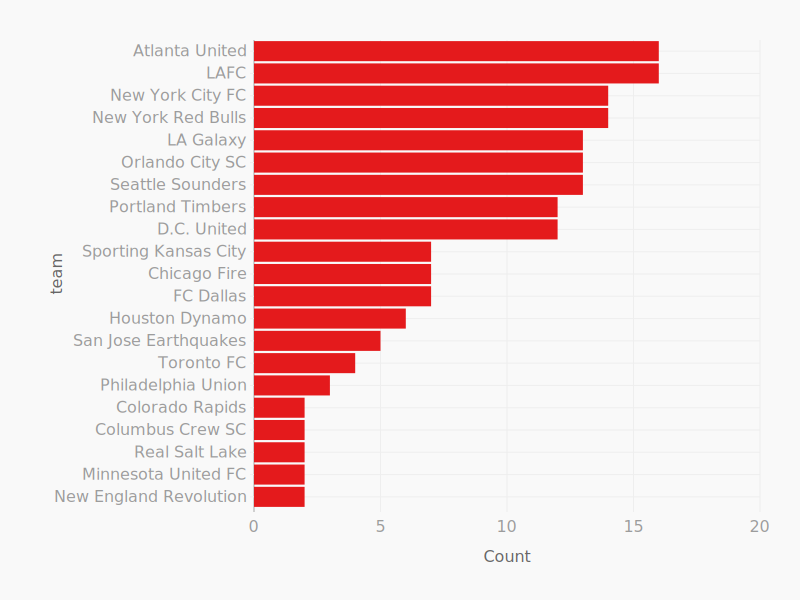

In [5]:
visitor = both.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
home = both.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
teams = agate.Table.merge([visitor, home])

print('len of visitor: {}'.format(len(visitor)))
print('len of home: {}'.format(len(home)))
print('len of teams: {}\n'.format(len(teams)))

teams_pivot = teams.pivot('team')
teams_chart = teams_pivot.order_by('Count', reverse=True)
teams_chart.print_table(max_rows=None, max_column_width=None)
teams_chart.bar_chart('team', 'Count')

## English language

len of en_visitor: 61
len of en_home: 61
len of en_teams: 122

| team                 | Count |
| -------------------- | ----- |
| Seattle Sounders     |    13 |
| Atlanta United       |    12 |
| LAFC                 |    12 |
| Portland Timbers     |    11 |
| Orlando City SC      |    11 |
| New York City FC     |    11 |
| New York Red Bulls   |    10 |
| LA Galaxy            |     9 |
| D.C. United          |     8 |
| Sporting Kansas City |     7 |
| Toronto FC           |     4 |
| Chicago Fire         |     2 |
| Philadelphia Union   |     2 |
| Columbus Crew SC     |     2 |
| Minnesota United FC  |     2 |
| San Jose Earthquakes |     1 |
| Colorado Rapids      |     1 |
| FC Dallas            |     1 |
| New England Revol... |     1 |
| Real Salt Lake       |     1 |
| Houston Dynamo       |     1 |


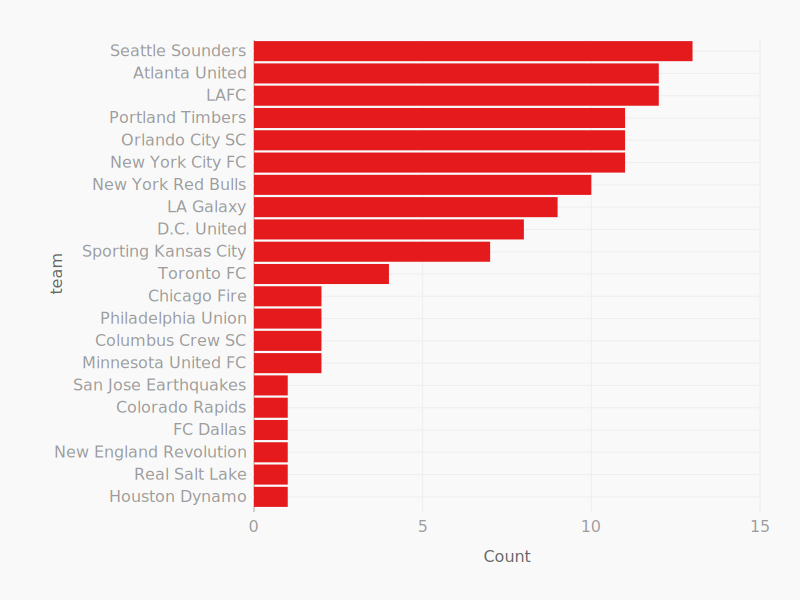

In [6]:
en_visitor = english.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
en_home = english.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
en_teams = agate.Table.merge([en_visitor, en_home])

print('len of en_visitor: {}'.format(len(en_visitor)))
print('len of en_home: {}'.format(len(en_home)))
print('len of en_teams: {}\n'.format(len(en_teams)))

en_teams_pivot = en_teams.pivot('team')
en_teams_chart = en_teams_pivot.order_by('Count', reverse=True)
en_teams_chart.print_table(max_rows=None)
en_teams_chart.bar_chart('team', 'Count')

## Spanish language

len of es_visitor: 25
len of es_home: 25
len of es_teams: 50

| team                 | Count |
| -------------------- | ----- |
| FC Dallas            |     6 |
| Houston Dynamo       |     5 |
| Chicago Fire         |     5 |
| New York Red Bulls   |     4 |
| LAFC                 |     4 |
| LA Galaxy            |     4 |
| San Jose Earthquakes |     4 |
| Atlanta United       |     4 |
| D.C. United          |     4 |
| New York City FC     |     3 |
| Orlando City SC      |     2 |
| Real Salt Lake       |     1 |
| Philadelphia Union   |     1 |
| Colorado Rapids      |     1 |
| Portland Timbers     |     1 |
| New England Revol... |     1 |


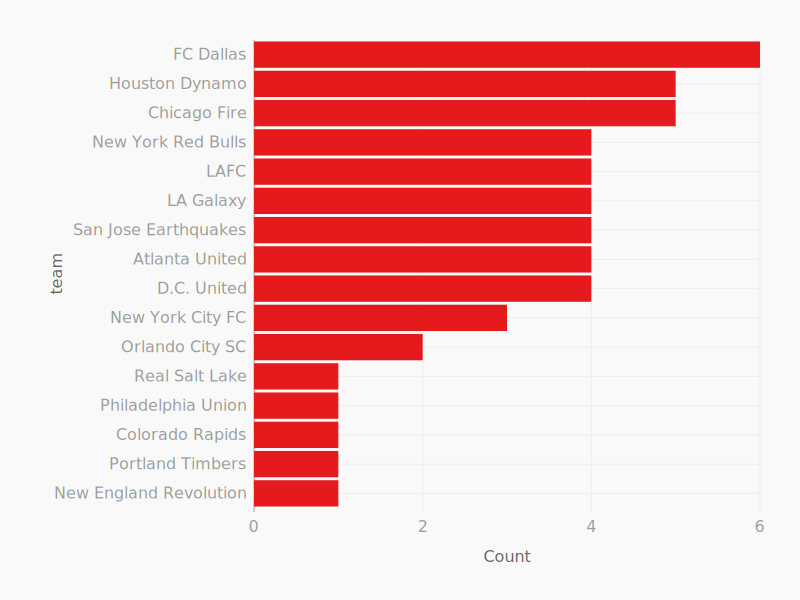

In [7]:
es_visitor = spanish.select(['Visitor', 'Date']).rename(column_names = ['team', 'date'])
es_home = spanish.select(['Home', 'Date']).rename(column_names = ['team', 'date'])
es_teams = agate.Table.merge([es_visitor, es_home])

print('len of es_visitor: {}'.format(len(es_visitor)))
print('len of es_home: {}'.format(len(es_home)))
print('len of es_teams: {}\n'.format(len(es_teams)))

es_teams_pivot = es_teams.pivot('team')
es_teams_chart = es_teams_pivot.order_by('Count', reverse=True)
es_teams_chart.print_table(max_rows=None)
es_teams_chart.bar_chart('team', 'Count')